In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.metrics as skl
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

url='https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-fuel-consumption.csv'
df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [2]:
statMDL=smf.ols('CO2EMISSIONS~ENGINESIZE+CYLINDERS+FUELCONSUMPTION_CITY+FUELCONSUMPTION_HWY+FUELCONSUMPTION_COMB+FUELCONSUMPTION_COMB_MPG', data= df).fit()
print(statMDL.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1419.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:02:03   Log-Likelihood:                -4766.4
No. Observations:                1067   AIC:                             9547.
Df Residuals:                    1060   BIC:                             9582.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [3]:
x = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB_MPG']]
y = df['CO2EMISSIONS']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [5]:
predictions = linreg.predict(x_test)

In [6]:
print('Coefficients:', linreg.coef_)
print('Intercept:', linreg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = linreg.score(x_test,y_test)
print('AccuracyII:',accuracy*100,'%')
print('R2:', r2_score(y_test, predictions))

Coefficients: [11.11172826  6.34337788 -4.73059216]
Intercept: 307.11680469186086
MAE: 14.528021284008478
MSE: 487.38392410064785
RMSE: 22.076773407829503
AccuracyII: 88.53480655959554 %
R2: 0.8853480655959554


In [7]:
print("Train set Accuracy: ", r2_score(y_train, linreg.predict(x_train)))
print("Test set Accuracy: ", r2_score(y_test, predictions))

Train set Accuracy:  0.8827636444239391
Test set Accuracy:  0.8853480655959554


<Axes: xlabel='CO2EMISSIONS'>

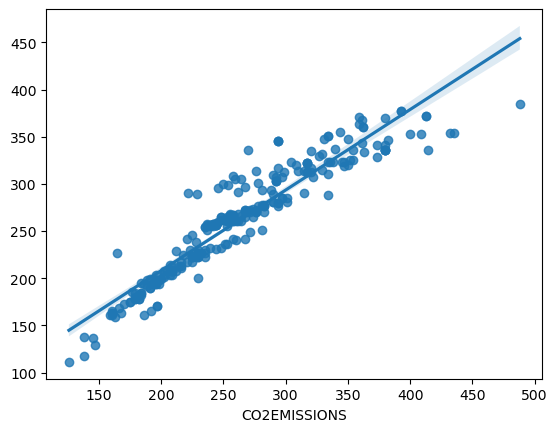

In [8]:
sns.regplot(x=y_test, y=predictions)

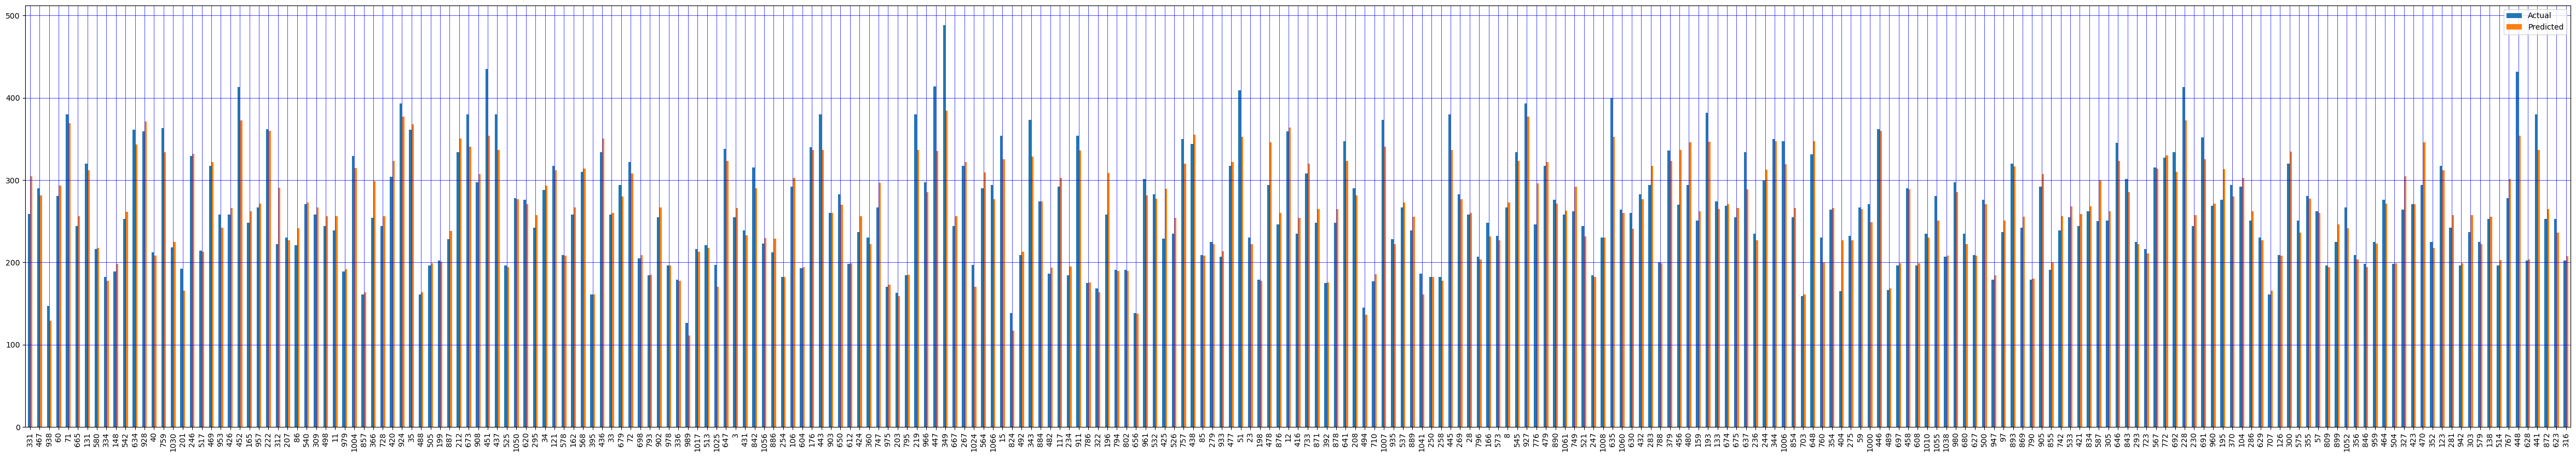

In [10]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

#actual vs predicted plot
df2.plot(kind='bar',figsize=(60,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [11]:
new_observation = [[4,7, 8]]
linreg.predict(new_observation)

G:\MawaConda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([358.12262559])

In [12]:
new_observation = [[4,4, 6]]
linreg.predict(new_observation)

G:\MawaConda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([348.55367627])